In [1]:
#5. Implement Simple  linear regression for the data set ‘student_score.csv’

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#data set contains details of no.of hours spend by students for studt and their marks
student = pd.read_csv('student_scores.csv')
student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [2]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [3]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


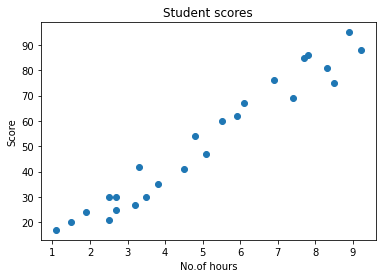

In [4]:
import matplotlib.pyplot as plt

Xax=student.iloc[:,0]
Yax=student.iloc[:,1]
plt.scatter(Xax,Yax)
plt.xlabel("No.of hours")
plt.ylabel("Score")
plt.title("Student scores")
plt.show()

In [5]:
#Perform the simple linear regression model
#Equation: Y=w0+w1.x
#Here Y(marks)=w0+w1.x
#Create x as hours and Y as marks

X = student.iloc[:, :-1]
y = student.iloc[:, 1]
print(X)

    Hours
0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8


In [6]:
print(y)

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train)

    Hours
2     3.2
10    7.7
0     2.5
24    7.8
20    2.7
23    6.9
21    4.8
5     1.5
7     5.5
9     2.7
14    1.1
11    5.9
4     3.5
1     5.1
13    3.3
15    8.9
3     8.5
12    4.5
16    2.5
8     8.3


In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
print(regressor.intercept_)

1.5168471077385064


In [10]:
print(regressor.coef_)

[10.04812237]


In [11]:
y_pred = regressor.predict(X_test)
for(i,j) in zip(y_test,y_pred):
    if i!=j:
        print("Actual value :",i,"Predicted value :",j)
print("Number of mislabeled points from test data set :", (y_test != y_pred).sum())

Actual value : 24 Predicted value : 20.60827961450772
Actual value : 69 Predicted value : 75.8729526604186
Actual value : 88 Predicted value : 93.95957292998943
Actual value : 67 Predicted value : 62.81039357683966
Actual value : 35 Predicted value : 39.69971212127693
Number of mislabeled points from test data set : 5


In [12]:
from sklearn import metrics
print("Mean Absolute error :", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared error :", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared error :", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute error : 5.022712904067519
Mean Squared error : 26.77957019148913
Root Mean Squared error : 5.174898085130676


[0 1 2 3 4]


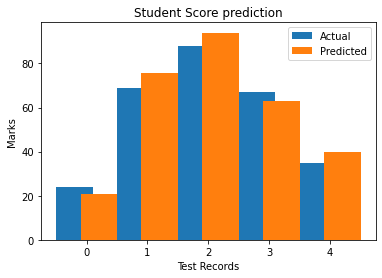

In [13]:
import matplotlib.pyplot as plt
c=X_test['Hours'].count()
xax=np.arange(c)
print(xax)
X_axis = np.arange(len(xax))
plt.bar(X_axis-0.2, y_test, 0.6, label='Actual')
plt.bar(X_axis+0.2, y_pred, 0.6, label='Predicted')

plt.xlabel("Test Records")
plt.ylabel("Marks")
plt.title("Student Score prediction")
plt.legend()
plt.show()